# In Depth 3 - Drawing DiHypergraphs

Here we show the fuctionalities and parameters of `xgi.draw_dihypergraph()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s Collection plotting.

In [1]:
import xgi
import numpy as np
import matplotlib.pyplot as plt

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
diedges = [({0, 1}, {2}), ({1}, {4}), ({2, 3}, {4, 5})]
DH = xgi.DiHypergraph(diedges)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28d884e20>,
  <matplotlib.collections.PathCollection at 0x28d87bd00>))

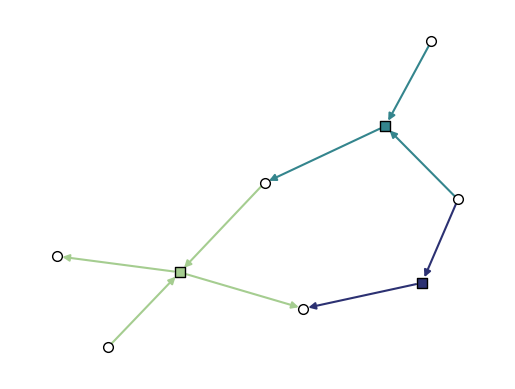

In [3]:
xgi.draw_dihypergraph(DH)

## Basics

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(node_collection, edge_node_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28db50160>,
  <matplotlib.collections.PathCollection at 0x28db50670>))

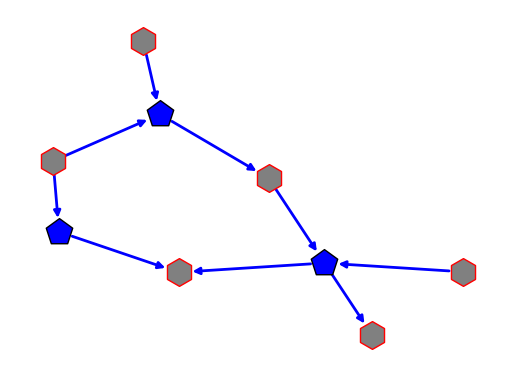

In [4]:
xgi.draw_dihypergraph(
    DH,
    node_shape="h",
    node_fc="grey",
    node_ec="r",
    node_size=20,
    edge_marker_size=20,
    edge_marker="p",
    lines_lw=2,
    arrowsize=10,
    edge_marker_fc="b",
    lines_fc="b",
)

Or with multiple values:

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/drawing/draw.py:455: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28dba2a90>,
  <matplotlib.collections.PathCollection at 0x28dba2d30>))

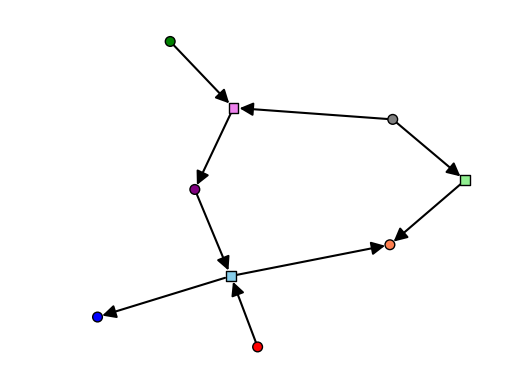

In [5]:
xgi.draw_dihypergraph(
    DH,
    node_fc=["g", "grey", "purple", "coral", "r", "b"],
    arrowsize=20,
    edge_marker_fc=["violet", "lightgreen", "skyblue"],
    lines_fc="k",
)

Adding node and edge labels:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28dc30850>,
  <matplotlib.collections.PathCollection at 0x28dc0a5e0>))

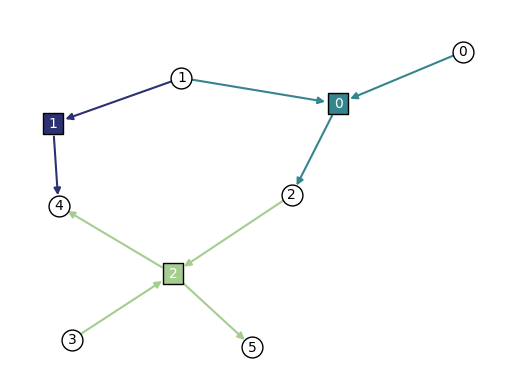

In [6]:
xgi.draw_dihypergraph(DH, node_labels=True, hyperedge_labels=True, node_size=15, edge_marker_size=15)

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

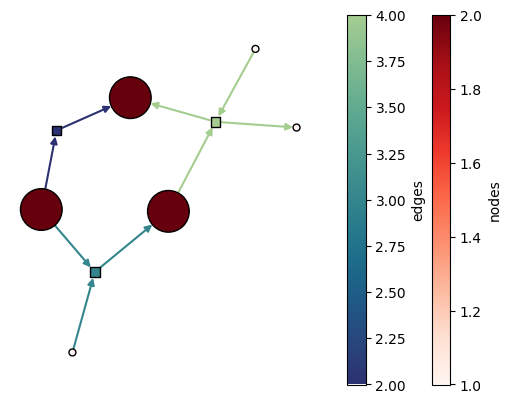

In [7]:
ax, collections = xgi.draw_dihypergraph(
    DH, node_fc=DH.nodes.degree, edge_marker_fc=DH.edges.size, node_size=DH.nodes.degree
)

node_coll, edge_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_coll, label="edges")

By default, the colormaps used are "crest_r" and "Reds". These can be changed:

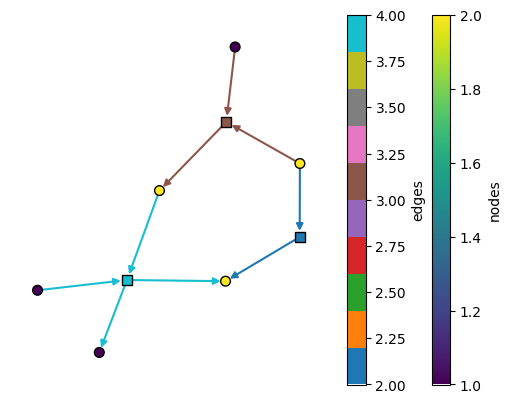

In [8]:
ax, collections = xgi.draw_dihypergraph(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_fc_cmap="viridis",
    edge_marker_fc_cmap="tab10",
)

node_coll, edge_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_coll, label="edges")

## Styling of arrows

By default, the `arrowstyle` used is `"-|>"`:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28dd7acd0>,
  <matplotlib.collections.PathCollection at 0x28df048b0>))

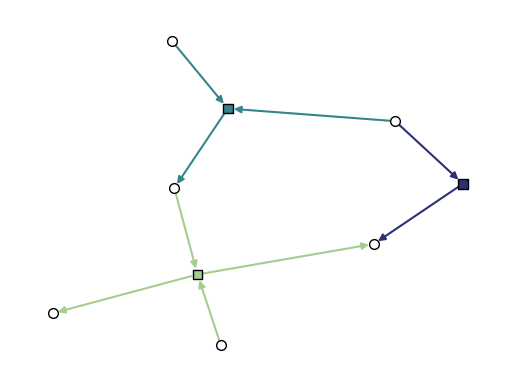

In [9]:
xgi.draw_dihypergraph(DH, arrowstyle="-|>")

Other styles can be used, see the full list from [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)

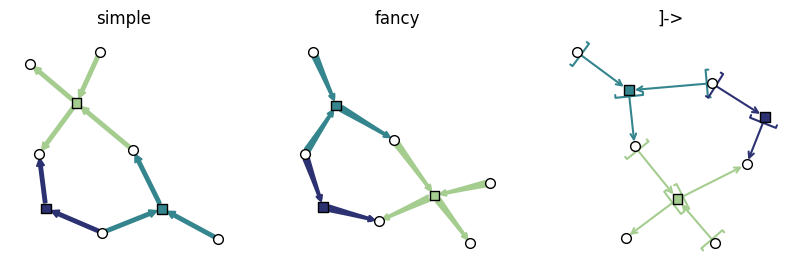

In [10]:
styles = ["simple", "fancy", "]->"]

fig, axs = plt.subplots(1, len(styles), figsize=(10, 3))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_dihypergraph(DH, arrowstyle=style, ax=ax)
    ax.set_title(f"{style}")

There is a second argument to style arrows: `connectionstyle`. The default value is `"arc3"`, but other values can be used

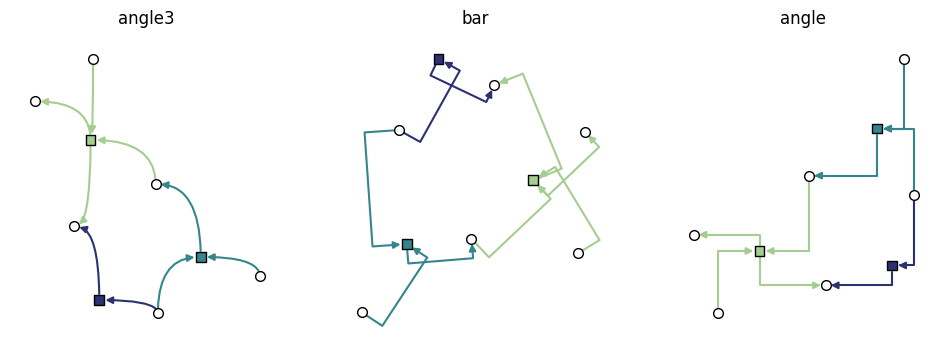

In [11]:
styles = ["angle3", "bar", "angle"]

fig, axs = plt.subplots(1, len(styles), figsize=(12, 4))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_dihypergraph(DH, connectionstyle=style, ax=ax)
    ax.set_title(f"{style}")

## Layout

The initial layout is computed based on the original nodes only. After that, the layout can be recomputed based on those original positions, with the edge-nodes starting at the barycenter, to avoid overlap:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28e952970>,
  <matplotlib.collections.PathCollection at 0x28e952d60>))

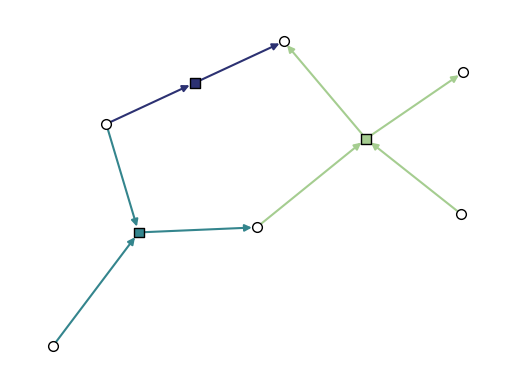

In [12]:
xgi.draw_dihypergraph(DH, iterations=0)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28e9a51f0>,
  <matplotlib.collections.PathCollection at 0x28e9b67f0>))

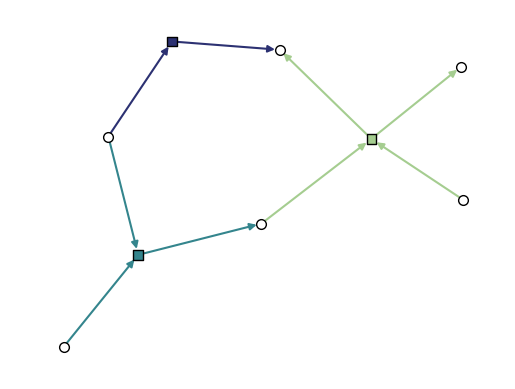

In [13]:
xgi.draw_dihypergraph(DH, iterations=50)

A larger example

In [14]:
edges = [
    [[8], [0]],
    [[1, 2], [0]],
    [[0, 3], [1]],
    [[1, 3], [2]],
    [[1, 5], [3]],
    [[2, 5], [4]],
    [[3, 4], [5, 6]],
    [[6, 7], [5]],
    [[5, 8], [6]],
    [[6, 8], [7]],
    [[6, 0], [8]],
    [[7, 0], [9]],
]

DH = xgi.DiHypergraph(edges)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28e9e4040>,
  <matplotlib.collections.PathCollection at 0x28e9e0c70>))

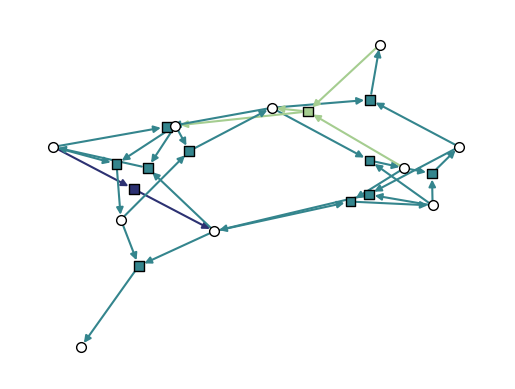

In [15]:
xgi.draw_dihypergraph(DH, iterations=0)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28ea9cd60>,
  <matplotlib.collections.PathCollection at 0x28e9e0910>))

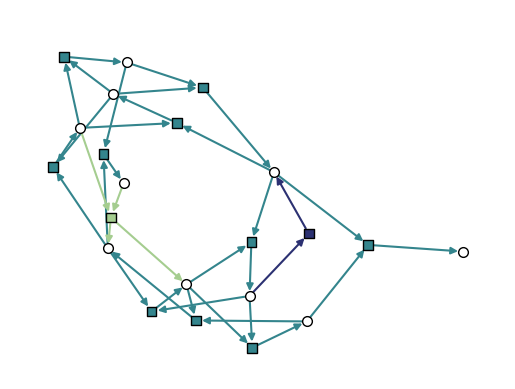

In [16]:
xgi.draw_dihypergraph(DH, iterations=50)